In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [20]:
df = pd.read_csv('/home/johnattan/Documents/CHIP/Twitter_Analysis/Train_Data/Monthly_Policy_Dem.csv', index_col='Date')
df = df[df.State == 'TX'][['BarsClosed', 'new_case', 'new_death', 'Unemployment']]
df['BarsClosed'] = df['BarsClosed'].astype("category")

In [21]:
print(df.shape)
df.head()

(12, 4)


,BarsClosed,new_case,new_death,Unemployment
Date,,,,
2020-01-31,0.0,0,0,3.6
2020-02-29,0.0,0,0,3.7
2020-03-31,1.0,3266,101,4.9
2020-04-30,1.0,24821,893,12.9
2020-05-31,1.0,36200,925,11.6


/home/johnattan/.local/share/virtualenvs/CHIP-GhDHLp-X/lib/python3.8/site-packages/matplotlib/axes/_base.py:509: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


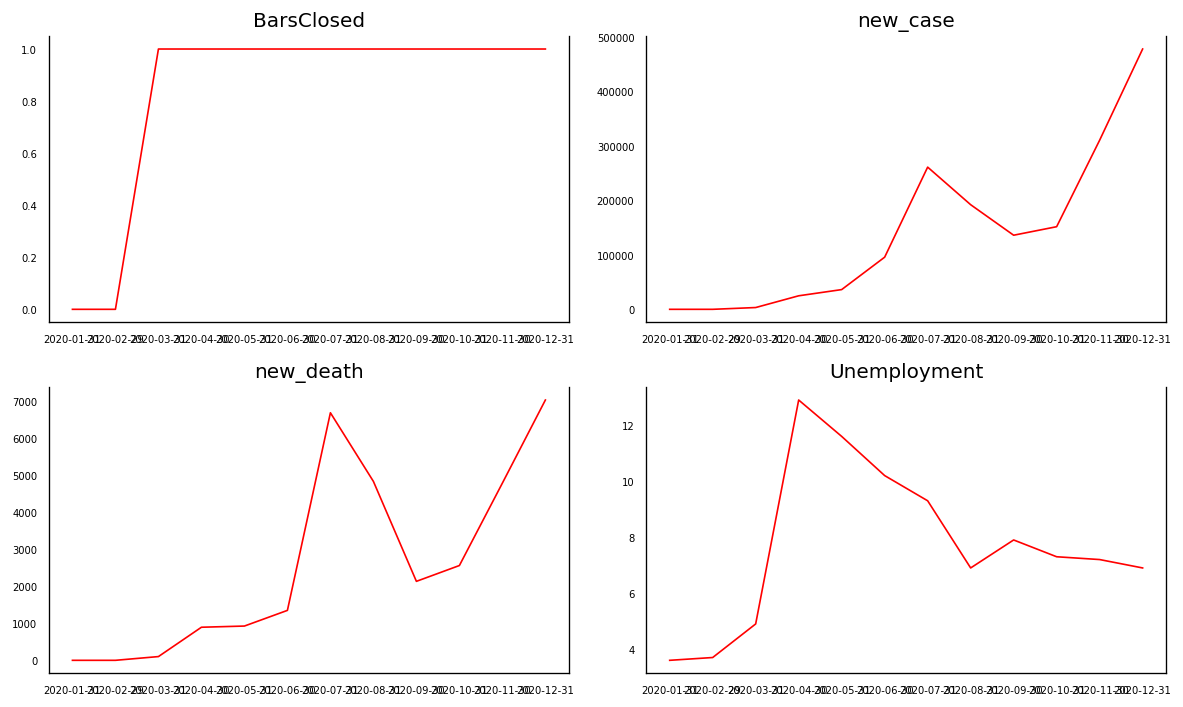

In [22]:
# Plot

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=1
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,BarsClosed_x,new_case_x,new_death_x,Unemployment_x
BarsClosed_y,1.0000,1.0000,1.0000,0.9739
new_case_y,0.5204,1.0000,0.0000,0.6662
new_death_y,0.2127,0.0003,1.0000,0.4506
Unemployment_y,0.0529,0.2074,0.2268,1.0000
